In [48]:
import VM
reload(VM)
from matplotlib import pyplot as plt
import numpy as np

In [49]:
from numba import jit

In [50]:
s = VM.System()

In [51]:
s.add_vortex(strength=1.0,z=-0.5+0j); s.add_vortex(strength=1.0,z=0.5+0j)


In [52]:
s.z

array([-0.5+0.j,  0.5+0.j])

In [53]:
n = 1000
s.simulate((6*np.pi**2)/n,n, s.RK2)

In [54]:
a = np.array(s.Z)
a[-1]

array([-0.49999992-0.00027904j,  0.49999992+0.00027904j])

In [57]:
plt.plot(np.real(a[:,0]), np.imag(a[:,0])); plt.plot(np.real(a[:,1]), np.imag(a[:,1]))

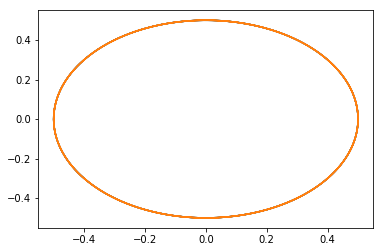

In [56]:
plt.show()

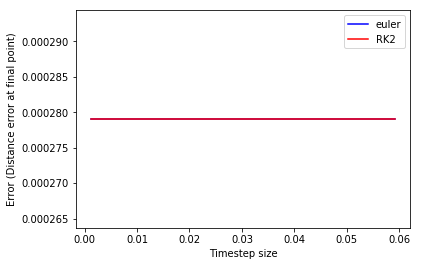

In [74]:
error = {}
fig, ax = plt.subplots()
for method, color in zip(["euler", "RK2"], ['b','r']):
    error[method] = []
    for n in np.linspace(5e4, 1e3, 15):
        s = VM.System()
        s.add_vortex(strength=1.0,z=-0.5+0j); s.add_vortex(strength=1.0,z=0.5+0j)
        if method == "euler":
            s.simulate((6*np.pi**2)/n,int(n), s.euler)
        else:
            s.simulate((6*np.pi**2)/n,int(n), s.RK2)
        
        error[method].append(np.absolute(a[-1][0] - a[0][0]))
    ax.plot(6*np.pi**2/np.linspace(5e4, 1e3, 15), error[method], color, label=method)
    ax.set(ylabel="Error (Distance error at final point)", xlabel="Timestep size")
plt.legend()
plt.show()

In [70]:
np.linspace(5e4, 1e3, 15)

TypeError: only length-1 arrays can be converted to Python scalars

In [75]:
"a" + "b"

'ab'